### 3 Pole, Equal Ripple (0.5dB) Band Stop Filter Calculator
As I have recently lost my ADS license, I was unable to verify the calculator with EM Simulation. However, the calculator is accurate to LTSpice and also Pozar textbook examples.

L1 and C1: 508.6857205882204 nH 5.1848782787263796e-24 pF
L2 and C2 8.905368678004166 nH 2.961666876173889e-22 pF
L3 and C3: 508.6857205882204 nH 5.1848782787263796e-24 pF


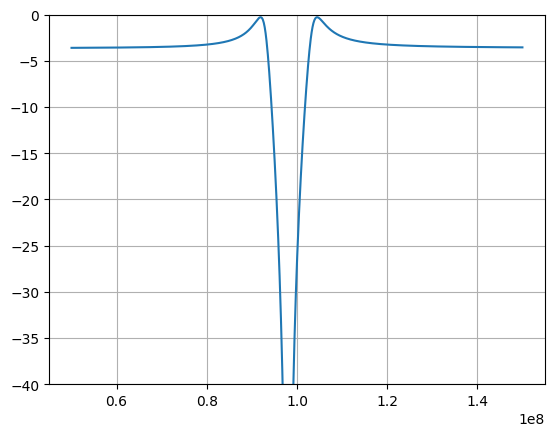

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from cmath import *
from IPython import get_ipython



def BandStop3Pole(f0, delta, fplotLow, fplotHigh):

    # Dictionary holding the pre - scaled impedance values for N = 3, 0.5dB equal ripple LPF
    Xs = {
        'g0': 1.0000,
        'g1': 1.5963,
        'g2': 1.0967,
        'g3': 1.5963,
        'g4': 1.0000,
    }

    # frequency matrices, etc
    f = np.linspace(fplotLow, fplotHigh, 1000)
    w = 2*pi*f
    Z0 = 50
    wC = 2*pi*f0
    



    """ --- Computing Lumped Element Impedance values from the frequency and impedance scaled equations in Pozar chapter 8 ---"""
    L1 = Z0/(Xs['g1']*wC*delta)
    C1 = Xs['g1']*delta/(wC*Z0)
    print("L1 and C1:", L1*1e9, "nH", C1*1e-12, "pF")


    L2 = Xs['g2']*delta*Z0/wC
    C2 = 1/(wC*Xs['g2']*delta*Z0)
    print("L2 and C2", L2*1e9, "nH", C2*1e-12, "pF")
    print("L3 and C3:", L1*1e9, "nH", C1*1e-12, "pF")


    Zsh = 1j*w*L1 + 1/(1j*w*C1)                            #Impedance of the Shunt element
    Zser = 1j*w*L2*1/(1j*w*C2) / (1j*w*L2 + 1/(1j*w*C2))   #Impedance of the Series element



    """ --- The ABCD Matrix has been computed by hand for the TL, Filter, and Load ---"""
    #ABCD Matrix for the Filter
    Af = 1 + Zser/Zsh
    Bf = Zser
    Cf = 2/Zsh + Zser/(Zsh**2)
    Df = 1 + Zser/Zsh

    #Total ABCD matrix
    A = Af + Z0*Cf + Bf/Z0 + Df
    B = Bf + Z0*Df
    C = Cf + Df/Z0
    D = Df

    #Computing S-Parameters from ABCD Matrix using Pozar Table 4.2
    S11 = (A + B/Z0 - C*Z0 - D) / (A + B/Z0 + C*Z0 + D)
    S21 = 2*(A*D - B*C) / ((A+B)/Z0 + C*Z0 + D)

    S11dB = 20*np.log10(abs(S11))       #S11 in dB
    S12dB = 20*np.log10(abs(S21))       #S12 in dB

    plt.plot(f, S12dB)
    plt.grid()
    plt.ylim([-40, 0])



#BandStop3Pole(3e9, 0.1, 2e9, 4e9)
BandStop3Pole(98e6, 0.1, 50e6, 150e6)
